In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils import *

In [2]:
train = pd.read_csv("data/train.csv", nrows=5 * 10 ** 7)
print(train.columns)
print(train.shape)

Index(['acoustic_data', 'time_to_failure'], dtype='object')
(50000000, 2)


In [3]:
print(train['acoustic_data'].mean())

# acoustic data is not centered around 0 so we discount the mean
NULL_OFF = 4.5

4.5133125


In [4]:
def extract_sign_changes(seq):
    signs = np.sign(seq)
    sign_changes = ((np.roll(signs, 1) - signs) != 0).astype(int)
    return sign_changes

def extract_rolling_frequency(seq, n=100):
    seq_len = len(seq)
    sign_changes = extract_sign_changes(seq)
    freq = np.cumsum(sign_changes, dtype=float)
    freq = freq - np.pad(freq, n, mode='constant')[:seq_len]
    return (freq / n)[n:]

def extract_rolling_variance(seq, n=100):
    seq_len = len(seq)
    vari = np.cumsum(abs(seq), dtype=float)
    vari = vari - np.pad(vari, n, mode='constant')[:seq_len]
    return vari[n:]

In [5]:
N_SEQ = 15000
N_TRAIN = 10

slices = random_sub_sequence_indexes(train['acoustic_data'], N_SEQ, n=N_TRAIN)
features, target = zip(*[subsequence_to_sample(train[sl]) for sl in slices])

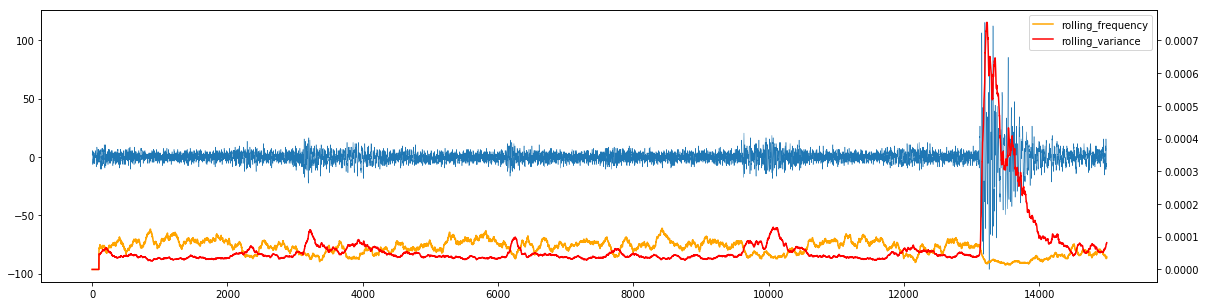

In [6]:
sequence = features[0] - NULL_OFF
FREQ_WIN = 100
VARI_WIN = 100

fig, ax1 = plt.subplots(figsize=(20, 5))
ax1.plot(sequence, lw=.5)
ax2 = ax1.twinx()
frequency = np.pad(extract_rolling_frequency(sequence, n=FREQ_WIN), FREQ_WIN, mode='constant')[:N_SEQ]
ax2.plot(frequency / sum(frequency), c='orange', label='rolling_frequency')
variance = np.pad(extract_rolling_variance(sequence, n=VARI_WIN), VARI_WIN, mode='constant')[:N_SEQ]
ax2.plot(variance / sum(variance), c='red', label='rolling_variance')
plt.legend()
plt.show()